**При выполнении данного проекта было использовано расширение - Nbextensions**

# Открываем файл с данными и рассматриваем общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
data = pd.read_csv('games.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.head(1)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


## Вывод

Некоторые столбцы имеют и верхний и нижний регистр в названии. Не везде правильные типы данных. В некоторых столбцах есть пропущенные значения. Столбец user_score имеет тип object, что является странным

# Предобработка данных

## Замена названий столбцов

In [5]:
data.columns = ['name', 'platform', 'release_year', 'genre', 'na_sales', 'eu_sales', 
                'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

## Обработка пропусков

**Обработка столбца 'release_year'**

In [6]:
len(data.query('release_year == "nan"')) / len(data['name'])

0.01609332934489979

In [7]:
data = data.query('release_year != "nan"')

*Поскольку пропуски в release year помешают дальнейшей работе с данными и составляют всего 1 % от данных, то было решено удалить данные строки*

**Обработка столбца 'user_score'**

In [8]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [9]:
data['user_score'] = data['user_score'].replace('tbd', 'nan')

*tbd значит, что данные будут или должны быть определены, получены позднее. Стоит заменить данное значение на NaN, чтобы в дальнейшем можно было считать характеристики по данному столбцу*

**Вывод**

Значения tbd в могли быть получены из-за того, что когда данные были собраны, игры не успели еще получить оценки пользователей и система автоматически проставила, что данные будут получены позднее

Что касаемо года выхода игры, пропуски могли появиться из-за того, что есть довольно старые игры, год появления которых мог просто затеряться со временем

Также, много пропусков в столбцах с оценкой критиков, пользователей и рейтингом. Но их много, и просто убрать из таблицы нельзя. Пока что оставим, потом, если будет необходимо, что-то сделаем с ними

## Преобразование типов данных

**Изменим тип данных в столбце 'release_year' на int**

In [10]:
data['release_year'] = data['release_year'].astype('int')

*Был выбран этот тип данных, поскольку to_datetime добавил бы ненуные месяцы и дни. В int годы выглядят лучше, чем в float*

**Изменим тип данных в столбце 'user_score' на 'float'**

In [11]:
data['user_score'] = data['user_score'].astype('float')

*Изменен с object на float, чтобы в дальнейшем строить графики, считать среднее и так далее*

## Подсчет общего количества проданных копий по всем регионам

In [12]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [13]:
data.head(3)

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52


## Вывод

Где необходимо, были изменены типы данных. Названия столбцов приведены к нижнему регистру. Удалены значения nan и to be determined были заменены на nan для последующей работы

# Исследовательский анализ

## Рассмотрение выпуска игр по годам

In [14]:
data = data.query('release_year >= 1995')

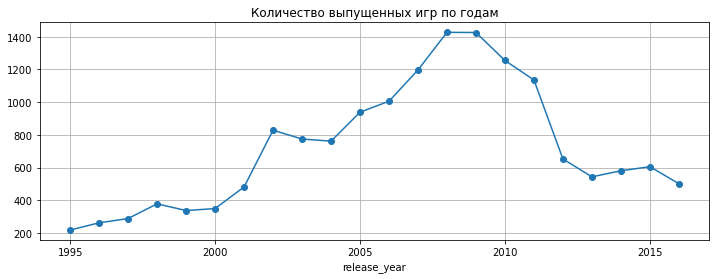

In [15]:
data.groupby('release_year')['release_year'].count().plot(figsize = (12,4), grid = True, style = '-o', 
                                                          title = 'Количество выпущенных игр по годам')

*Было приняте решение остаить только игры, выпущенные с 1995 года, потому что до этого выпуск был очень малочисленным, возмодности компьютеров другие, интересы потребителей тоже другие.*

## Оценка продаж по платформам

**Определим топовые платформы с заметным отрывом от предыдущего конкурента**

In [16]:
platform_sales = data.groupby('platform')['total_sales'].sum().sort_values(ascending = False)
platform_sales.head(6)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS       721.55
Name: total_sales, dtype: float64

**Построим графики распределения продаж по топовым платформам**

In [17]:
def make_platform_plot(df, platform, title):
    df[df['platform'] == platform].groupby('release_year')['total_sales'].sum().plot(
        style = '-o',
        title = title,
        figsize = (16,6), grid = True,
        legend = True, label = platform,
        linewidth = 2.5, alpha = 0.8
    )

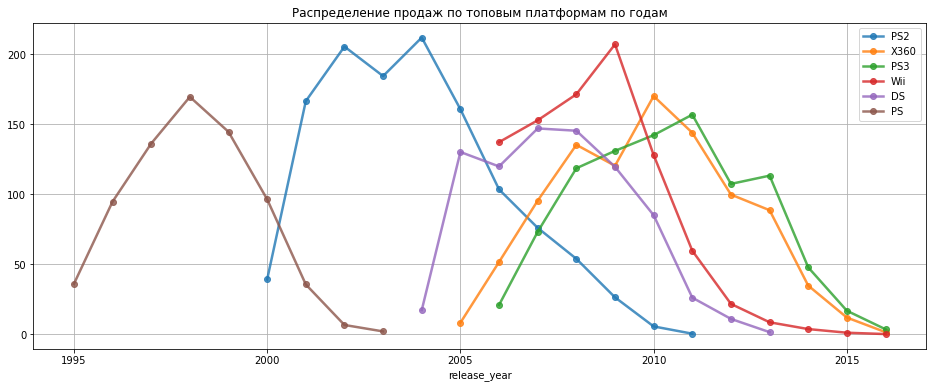

In [18]:
for i in ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']:
    make_platform_plot(data, i, 'Распределение продаж по топовым платформам по годам')

**Вывод**

Каждая платформа быстро взлетала и быстро падала. Средний "срок жизни" платформы - 10 лет

## Определение актуального периода для анализа на 2017 год

**Посмотрим график прожаж по всем платформам**

In [19]:
platform_list = list(data['platform'].unique())

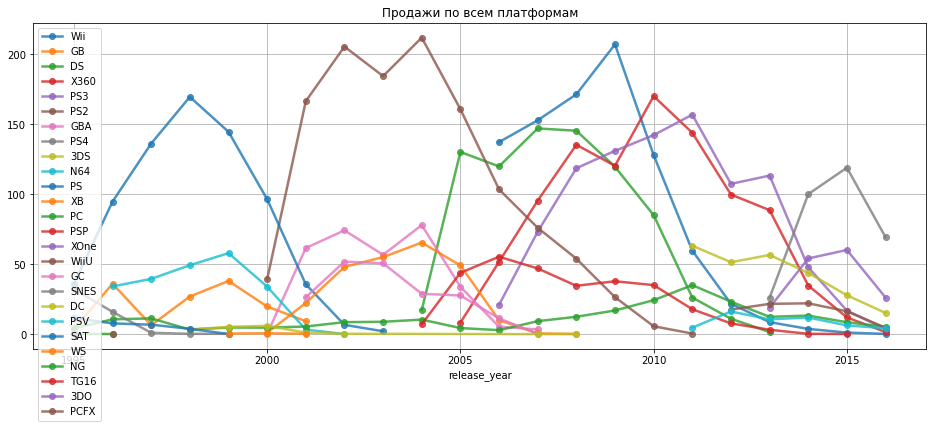

In [20]:
for i in platform_list:
    make_platform_plot(data, i, 'Продажи по всем платформам')

**Основываясь на графиках можно сделать вывод, что начиная с 2010 года интересен к играм на всех платформах начал падать. Задалась определенная тенденция. Данные по этой тенденции мы и оставим**

In [21]:
actual_data = data.query('release_year >= 2010')

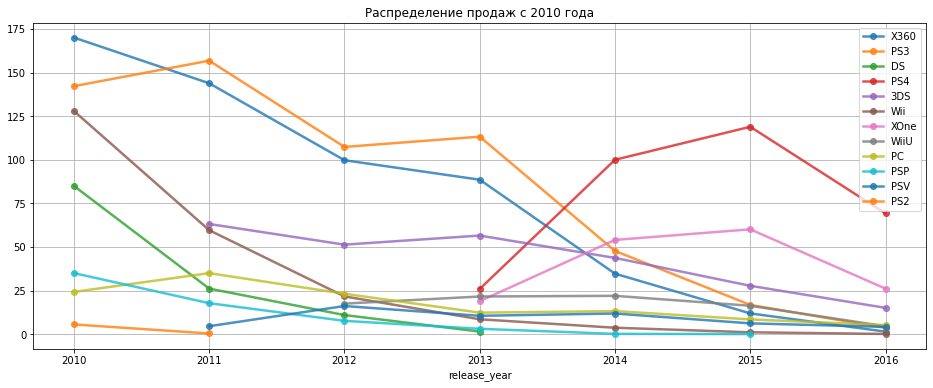

In [22]:
actual_platform_list = list(actual_data['platform'].unique())
for i in actual_platform_list:
    make_platform_plot(actual_data, i, 'Распределение продаж с 2010 года')

**Вывод**

Продажи по всем платформам продолжают падать с каждым годом. Выход PS4 и XOne конечно был интересен пользователям и интерес к ним рос, но только до 2015 года. В 2016 году, хоть интерес к ним стал падать, все равно они остаются самыми перспективными на данный момент и 2017 год

Также, стоит отметить, что платформа 3DS будет не менее актуальна, чем XOne, потому что интерес к ней падает медленне, значит, в 2017 году эти платформы могут оказаться на одинаковом уровне

## Изучение глобальных продаж по платформам

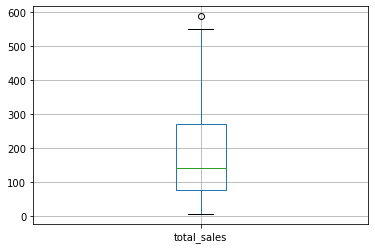

In [23]:
actual_data.groupby('platform')['total_sales'].sum().reset_index().boxplot()

**Вывод**

Диаграмма размаха доказывает, что в оснвном, за время своего существования, платформы успевают продать около 150 млн копий игр. Но, есть и выбивающиеся платформы, которые продают около 600 копий. Графики, выведенные выше, показывают, что дело не во "времени жизни" платформы, а в ее популярности среди пользователей

## Рассмотрение влияния оценок критиков и пользователей на продажи

**Для анализа возьмем самую актуальную платформу за последние годы - PS4**

In [24]:
ps4 = actual_data.query('platform == "PS4"')

**Рассмотрение зависимости от оценки критиков**

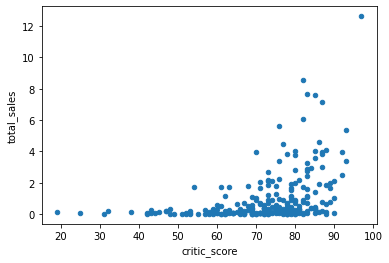

In [25]:
ps4.plot(kind = 'scatter', x = 'critic_score', y = 'total_sales')

**Рассмотрение зависимости от оценки пользователей**

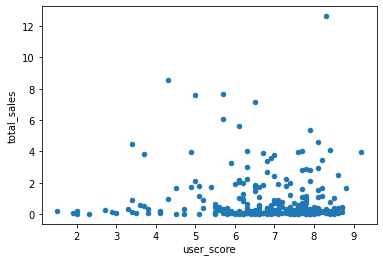

In [26]:
ps4.plot(kind = 'scatter', x = 'user_score', y = 'total_sales')

**Рассмотрение корреляции для двух этих факторов соответственно**

In [27]:
ps4['critic_score'].corr(ps4['total_sales'])

0.40656790206178095

In [28]:
ps4['user_score'].corr(ps4['total_sales'])

-0.031957110204556424

**Теперь рассмотрим корреляции по всем платфомам с 2010 года**

In [29]:
def get_user_corr(score_type, platform):
    new_data = actual_data[actual_data['platform'] == platform][['platform', 'user_score', 'critic_score', 'total_sales']]
    return new_data[score_type].corr(new_data['total_sales'])

In [30]:
for i in actual_platform_list:
    print(get_user_corr('user_score', i), '---', i)

0.0660351817393196 --- X360
0.06509241630476509 --- PS3
0.25142811742297444 --- DS
-0.031957110204556424 --- PS4
0.22207843643390882 --- 3DS
0.14715977707531702 --- Wii
-0.06892505328279414 --- XOne
0.4002190202148617 --- WiiU
-0.01108714966282253 --- PC
0.19063632529960095 --- PSP
0.0134887568358865 --- PSV
0.07472375514301433 --- PS2


In [31]:
for i in actual_platform_list:
    print(get_user_corr('critic_score', i), '---', i)

0.3400641581317536 --- X360
0.4005940935202247 --- PS3
0.2801624634637196 --- DS
0.40656790206178095 --- PS4
0.3487397305984834 --- 3DS
0.3105877104820997 --- Wii
0.4169983280084017 --- XOne
0.34837976012017485 --- WiiU
0.3364970713018004 --- PC
0.4032249446116779 --- PSP
0.13176292727608935 --- PSV
nan --- PS2


A:\Utilities\Anaconda\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
A:\Utilities\Anaconda\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


**Вывод**

Сначала был использован вид графика 'hexbin', но он не показал никакой зависимости. Но корреляция и другой вид графика привели к выводу, что зависимости продаж от оценок пользователей нет. Завсимость от оценок критиков определенно есть, не сильная, не слабая, средняя. Достаточно сильная, чтобы обратить на нее внимание во время принятие решения

Также, рассмотрев корреляцию по всем платформам можно подтвердить вывод, сделанный выше. Только для некоторых платформ оценка пользователя влияет на продажи. Но в большинстве своем, оценка пользователя не влияет, а критика - влияет

In [32]:
actual_data.groupby('genre')['total_sales'].sum().sort_values()

genre
Puzzle           20.60
Strategy         35.84
Adventure        61.00
Simulation       71.75
Fighting         81.59
Platform        119.72
Racing          122.68
Misc            234.56
Role-Playing    315.28
Sports          328.39
Shooter         479.74
Action          673.09
Name: total_sales, dtype: float64

Shooter и Action сильно выделяются среди других жанров по количество продаж. Также видно, что логические игры наименее интересны для покупателей

## Вывод

К каждому шагу был прописан отдельный расписанный вывод. Здесь собрана только общая информация:

1) Shooter и Action - самые популярные жанры

2) Оценка пользователей не влияет, а оценка критиков влияет на продажи

3) В основном, платформы живут 10 лет и успевают продать около 150 млн копий

4) Интерес к играм по всем платформам начал и продолжает падать с 2010 года

# Составление портрета пользователя каждого региона

## Самые популярные платформы в регионах

In [33]:
def get_top5(group_column, column):
    top5 = actual_data.groupby(group_column)[column].sum().sort_values(ascending = False).reset_index()
    top5['proportion'] = top5[column] / top5[column].sum()
    return top5.head()

In [34]:
def get_top5_plot(group_column, column):
    get_top5(group_column, column).plot(x = group_column, y = column, title = column, kind = 'bar')

In [35]:
get_top5('platform', 'na_sales')

,platform,na_sales,proportion
0,X360,334.18,0.295627
1,PS3,229.25,0.202803
2,Wii,121.20,0.107218
3,PS4,108.74,0.096195
4,XOne,93.12,0.082377


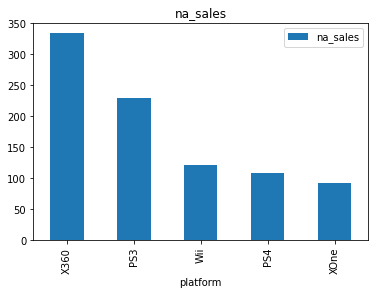

In [36]:
get_top5_plot('platform', 'na_sales')

In [37]:
get_top5('platform', 'eu_sales')

,platform,eu_sales,proportion
0,PS3,213.60,0.253920
1,X360,163.41,0.194256
2,PS4,141.09,0.167723
3,PC,68.82,0.081811
4,Wii,65.91,0.078351


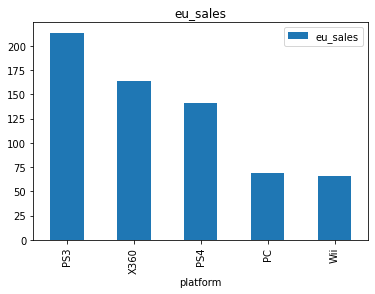

In [38]:
get_top5_plot('platform', 'eu_sales')

In [39]:
get_top5('platform', 'jp_sales')

,platform,jp_sales,proportion
0,3DS,100.62,0.329750
1,PS3,59.26,0.194206
2,PSP,42.20,0.138297
3,DS,27.90,0.091433
4,PSV,21.84,0.071574


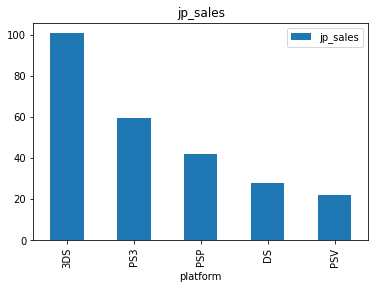

In [40]:
get_top5_plot('platform', 'jp_sales')

**Вывод**

Лидеры в кажом регионе разные. Но, если интересны жителей Европы и Северной Америки хотя бы похожи, то интересены японских пользователей сильно отличаются. Люди там, в первую очередь предпочитают платформу 3DS, которая совсем непопулярна в NA и EU

## Самые популярные жанры в регионах

In [41]:
get_top5('genre', 'na_sales')

,genre,na_sales,proportion
0,Action,290.64,0.257110
1,Shooter,237.47,0.210074
2,Sports,156.81,0.138720
3,Misc,123.80,0.109518
4,Role-Playing,112.05,0.099123


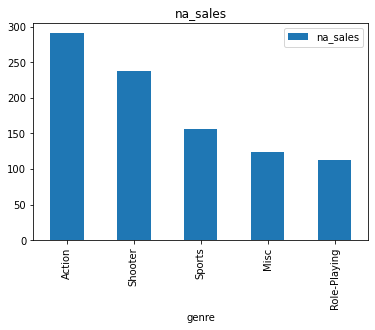

In [42]:
get_top5_plot('genre', 'na_sales')

In [43]:
get_top5('genre', 'eu_sales')

,genre,eu_sales,proportion
0,Action,233.63,0.277731
1,Shooter,171.45,0.203814
2,Sports,116.84,0.138895
3,Role-Playing,75.48,0.089728
4,Misc,66.09,0.078565


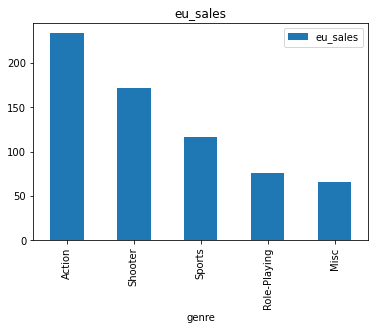

In [44]:
get_top5_plot('genre', 'eu_sales')

In [45]:
get_top5('genre', 'jp_sales')

,genre,jp_sales,proportion
0,Role-Playing,103.54,0.339320
1,Action,72.20,0.236613
2,Misc,24.29,0.079603
3,Platform,15.81,0.051812
4,Adventure,15.67,0.051353


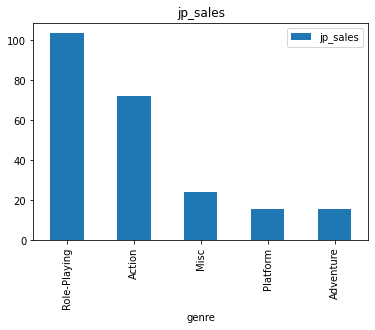

In [46]:
get_top5_plot('genre', 'jp_sales')

**Вывод**

Ситуация похожа. Одни и те же жанры в Европе и Америке имеют примерно одинаковую популярность. Можно выделить Экшен и Шутер. Но ситуация в Японии сильно отличается, хоть жанр Экшен и остается в топ-2 по популярности, первое место занимают ролевые игры, с большим отрывом и охватом 34 % рынка

## Влияние рейтинга ESRB на продажи в регионах

In [47]:
get_top5('rating', 'na_sales')

,rating,na_sales,proportion
0,M,382.22,0.392145
1,E,271.15,0.278191
2,T,160.81,0.164986
3,E10+,159.38,0.163519
4,EC,1.13,0.001159


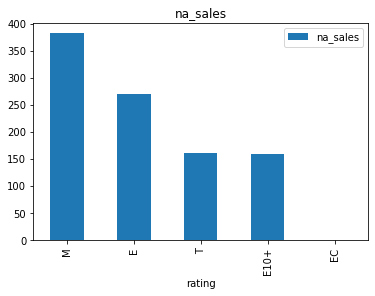

In [48]:
get_top5_plot('rating', 'na_sales')

In [49]:
get_top5('rating', 'eu_sales')

,rating,eu_sales,proportion
0,M,292.04,0.416148
1,E,197.34,0.281203
2,T,113.08,0.161135
3,E10+,99.28,0.141471
4,RP,0.03,0.000043


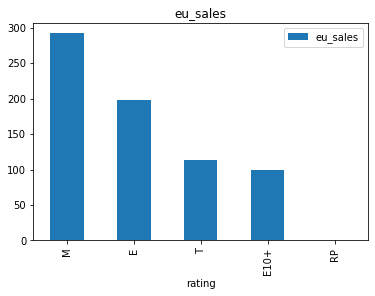

In [50]:
get_top5_plot('rating', 'eu_sales')

In [51]:
get_top5('rating', 'jp_sales')

,rating,jp_sales,proportion
0,E,47.87,0.358174
1,T,42.11,0.315077
2,M,30.45,0.227834
3,E10+,13.22,0.098915
4,RP,0.00,0.000000


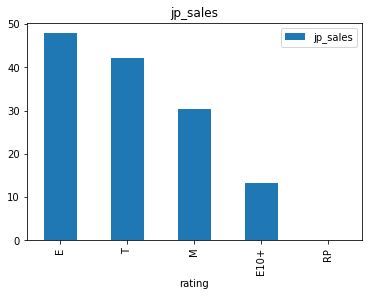

In [52]:
get_top5_plot('rating', 'jp_sales')

**Вывод**

В Европе и Америке самые популярные игры 17+, затем идут игры для всех возрастов. Гистограмма для Японии показывает, что играющие пользователи там младше. Самые популярные игры для любых возрастов, затем для тинейджеров, и только потом для 17+

## Вывод

Судя по гистограммам, Европейцы больше любят продукцию компании PlayStation. В Америке пользователи отдают предпочтение X360, хотя и PS3 довольно популярна. В Японии интересы другие. Про X360 там будто и не слышали, а вот платформа 3DS уверенно занимает первое место по продажам.

Интерес к жанрам в Европе и Америке одинаковый. Экшен находится на первом месте, занимая примерно 26% рынка. В Японии, экшен на втором месте, а на первом - ролевые игры, с долей рынка в 34%.

В Европе и Америке играющие пользователи скорее всего старше, чем в Японии. Также, чем меньше ограничение по возрасту , тем больше продаж будет у игры в Японии

# Проверка гипотез

## Проверим, одинаковые ли средние пользовательские рейтинги платформа Xbox One и PC

**Подготовим столбцы с данными для анализа**

In [68]:
XOne_rating = actual_data.query('platform == "XOne"')
XOne_rating = XOne_rating['user_score']
XOne_rating = XOne_rating.fillna(XOne_rating.mean())
PC_rating = actual_data.query('platform == "PC"')
PC_rating = PC_rating['user_score']
PC_rating = PC_rating.fillna(PC_rating.mean())

**Взглянем на гистограммы, чтобы примерно предаствлять распределение**

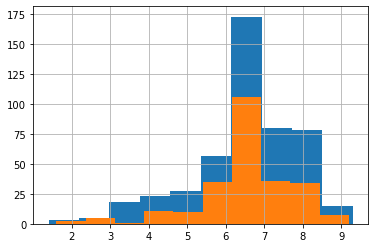

In [69]:
PC_rating.hist()
XOne_rating.hist()

**Формируем гипотезы**

*Нулевая гипотеза: Средние рейтинги одинаковые*

*Альтернативная гипотеза: Средние рейтинги различаются*

In [74]:
alpha = 0.05
result = st.ttest_ind(XOne_rating, PC_rating, equal_var = False)
print(result.pvalue)
if (result.pvalue < alpha):
    print("Средние рейтинги различаются")
else:
    print('\033[1m' + "Средние рейтинги практически одинаковые" + '\033[0m')

0.9736762884836526
Средние рейтинги практически одинаковые


## Проверим, разные ли средние пользовательские рейтинги жанров Action и Sports

In [90]:
action_rating = actual_data.query('genre == "Action"')
action_rating = action_rating['user_score']
action_rating = action_rating.fillna(action_rating.mean())
sports_rating = actual_data.query('genre == "Sports"')
sports_rating = sports_rating['user_score']
sports_rating = sports_rating.fillna(sports_rating.mean())

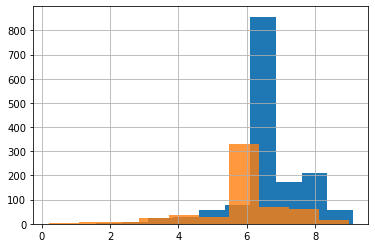

In [91]:
action_rating.hist()
sports_rating.hist(alpha = 0.8)

**Формируем гипотезы**

*Нулевая гипотеза: Средние рейтинги одинаковые*

*Альтернативная гипотеза: Средние рейтинги различаются*

In [98]:
alpha = 0.05
result = st.ttest_ind(action_rating, sports_rating, equal_var = False)
print(result.pvalue)
if (result.pvalue < alpha):
    print('\033[1m' + "Средние рейтинги различаются" + '\033[0m')
else:
    print('\033[1m' + "Средние рейтинги практически одинаковые" + '\033[0m')

1.5072433522482183e-46
Средние рейтинги различаются


## Вывод

Проверка гипотез показала, что: 

1. Средние рейтинги по платформам Xbox One и PC практически одинаковые

2. Средние рейтинги по жанрам Sports и Action сильно различаются

Также, предварительно эти выводы можно было сделать и по гистограммам. Там это хорошо видно

#  Общий вывод

Данный проект позволил сделать следующие выводы:

1. Интересен к играм на платформах, предоставленных в данных начал падать в 2010 году и продолжает это делать

2. Пик количества выпускаемых игр был в 2008 и 2009 годах, после этого идет спад

3. Новые платформы хоть и продолжают появляться, но уже не имеют такого успеха, как предыдущие их модели

4. Средний срок жизни платформы - 10 лет. Если с даты выпуска прошло уже больше 7-8 лет, то не стоит в нее инвестировать

5. На продажи влияет оценка критиков, в то время как оценка пользователей значения не имеет

6. Самые популярные жанры зависят от региона. Европа и Америка еще похожи у них лидирует X360 и PS3. В Японии же есть своя популярная платформа - 3DS, про X360 там даже не знают

7. Пользователи из Америки и Европы предпочитают одинаковые жанры. На первом месте - Action. В Японии ситуация другая - на первом месте Role-Playing

8. В Японии, чем меньше ограничение по возрасту для игры, тем более она популярна. В Европе и Америке такой тенденции не прослеживается

9. Если Еврпоу и Америку можно объеденить по многим параметрам и изучать вместе, то Японский рынок требует отдельного рассмотрения

10. Средние рейтинги по Xbox One и PC - одинаковые

11. Средние рейтинги жанров Ation и Sports - различаются

На основе вышеуказаных выводов можно определить потенциально успешный продукт и спланировать рекламную компанию 2017 года